<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/faceDetection/tests/Face_detection_folder_PWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PWO Face Detection

https://github.com/spmallick/learnopencv/tree/master/FaceDetectionComparison

1. Linking next cloud

In [1]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

input_folder, output_folder = create_io(database=nextcloud,topic='faceDetection',library='FD')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2235  100  2235    0     0  16313      0 --:--:-- --:--:-- --:--:-- 16433
what's the username for nextcloud? colab
what's the password for user colab? ··········
0
Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  
content of /etc/fstab: https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ /content/database davfs user,rw,auto 0 0


In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Read input images from folder
FD_files = glob.glob(input_folder + '/*.jpg')
FD_files.sort()
for file in FD_files:
    print("Reading Image ::: " + file)
    #img = cv2.imread(file, cv2.IMREAD_COLOR)   
    #plt.figure(figsize=(10,10))
    #plt.imshow(img[:,:,::-1])

Reading Image ::: /content/database/skinRetouching/input/LB_0001.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0002.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0003.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0004.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0005.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0006.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0007.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0008.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0009.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0010.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0011.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0012.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0013.jpg
Reading Image ::: /content/database/skinRetouching/input/LB_0014.jpg
Reading Image ::: /content/databas

# Face Detection using DNN

In [ ]:
# Function for rectangular blur with dnn
def detect(frame, net, scale, mean, in_width, in_height):
    h = frame.shape[0]
    w = frame.shape[1]
   # Convert the image into a blob format.
    blob = cv2.dnn.blobFromImage(frame, scalefactor=scale, 
                                 size=(in_width, in_height), mean=mean, swapRB=False, crop=False)
    # Pass the blob to the DNN model.
    net.setInput(blob)
    # Retrieve detections from the DNN model.
    detections = net.forward()

    # Process each detection.
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > detection_threshold:

            # Extract the bounding box coordinates from the detection.
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype('int')

            # Annotate the video frame with the detection results.
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = 'Confidence: %.4f' % confidence
            label_size, base_line = cv2.getTextSize(label, font_style, font_scale, font_thickness)
            cv2.rectangle(frame, (x1, y1 - label_size[1]), (x1 + label_size[0], y1 + base_line), 
                          (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (x1, y1), font_style, font_scale, (0, 0, 0))
    return frame

In [ ]:
# Create a network object.
net = cv2.dnn.readNetFromCaffe('./model/deploy.prototxt',
                               './model/res10_300x300_ssd_iter_140000.caffemodel')

In [ ]:
# Model parameters used to train model.
mean = [104, 117, 123]
scale = 1.0
in_width = 300
in_height = 300

In [ ]:
# Set the detection threshold for face detections.
detection_threshold = 0.5

# Annotation settings.
font_style = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

Face Detect ::: images/01.jpg
Face Detect ::: images/02.jpg
Face Detect ::: images/03.jpg
Face Detect ::: images/04.jpg
Face Detect ::: images/part01-AI-001695.jpg
Face Detect ::: images/part01-AI-003759.jpg


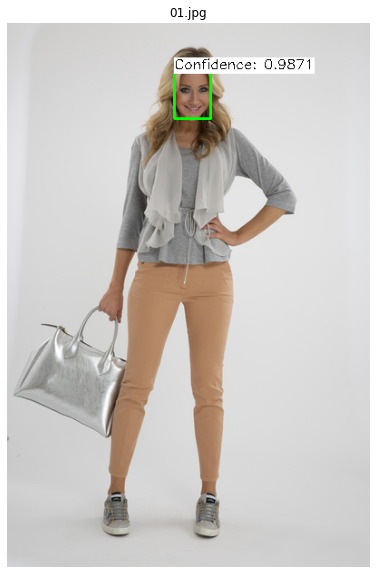

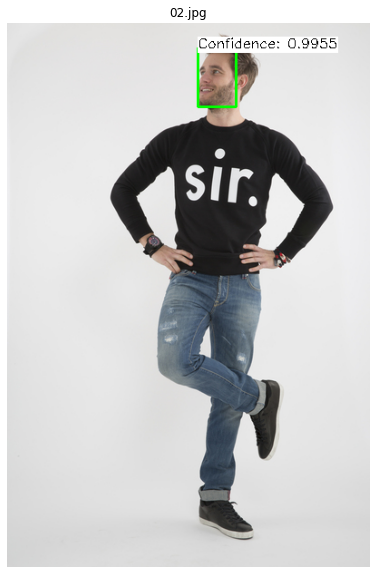

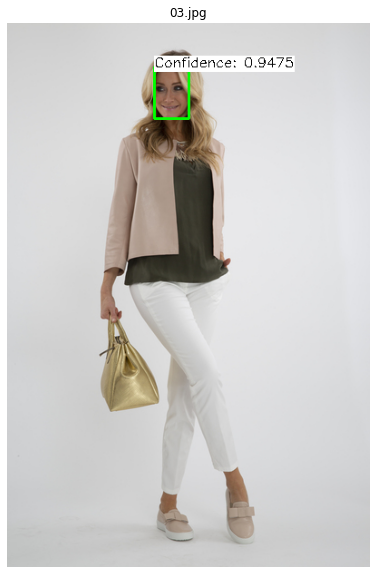

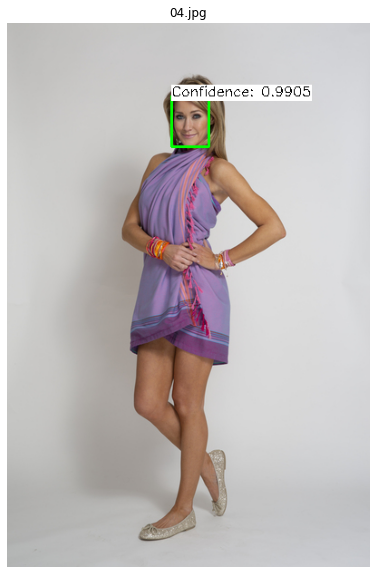

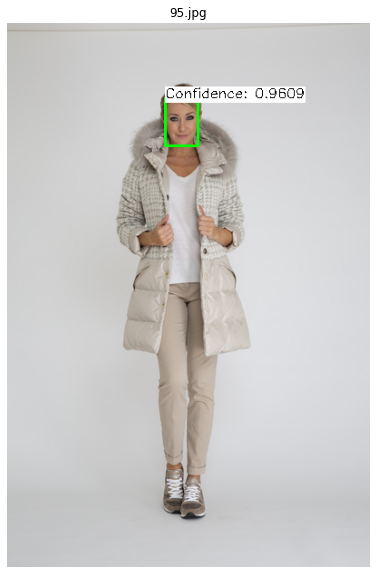

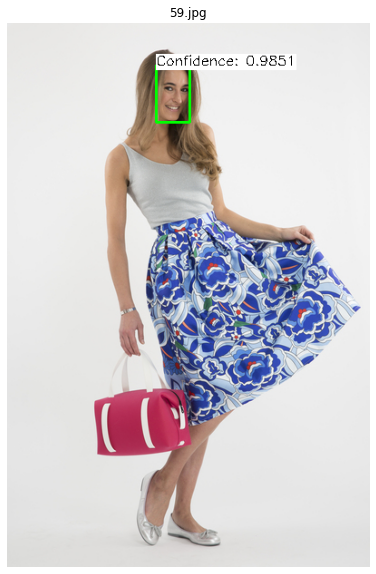

In [ ]:
for file in FD_files:
    print("Face Detect ::: " + file)
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    faceD = detect(img, net, scale, mean, in_width, in_height)
    plt.figure(figsize = [15,10])
    plt.imshow(faceD[:,:,::-1])
    plt.axis('off')
    plt.title(file[-6:]);